<a href="https://colab.research.google.com/github/milowia/python_wagon/blob/main/ML_Clustering_Customers_clustering_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 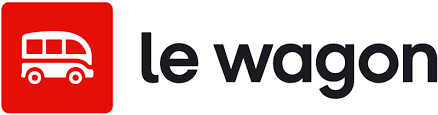

# Orders clustering

The purpose of the exercise is to extract different "typical profiles" of orders and consumers from Greenweez's turnover data. To achieve this, we will apply unsupervised learning algorithms to create order clusters.

## Orders clustering

a) Execute the cell below to load  the data into a `df` variable.

It will select 50k orders randomly (`ORDER BY rand()` in the SQL query).

In [14]:
from google.colab import auth
import pandas as pd

# get credentials
auth.authenticate_user()

query = '''
SELECT turnover_grocery, turnover_beauty, turnover_baby, turnover_home, turnover_fresh, promo_rate
FROM `data-analytics-bootcamp-363212.course33.gwz_orders_segmentation`
ORDER BY rand()
LIMIT 50000
'''
df = pd.read_gbq(query, project_id="data-analytics-bootcamp-363212")
df.head()

<ipython-input-14-40120a5a6a92>:13: FutureWarning:

read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq



turnover_grocery  turnover_beauty  turnover_baby  turnover_home  \
0             43.45            20.62           0.00           0.00   
1             40.88            26.23          58.71           0.00   
2              0.00            16.09           0.00           0.00   
3             16.35            21.28           0.00          10.31   
4              0.00            21.63           9.18           3.70   

   turnover_fresh  promo_rate  
0             0.0         NaN  
1             0.0    0.031303  
2             0.0         NaN  
3             0.0    0.271996  
4             0.0         NaN

b) Which features do you see?

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   turnover_grocery  50000 non-null  float64
 1   turnover_beauty   50000 non-null  float64
 2   turnover_baby     50000 non-null  float64
 3   turnover_home     50000 non-null  float64
 4   turnover_fresh    50000 non-null  float64
 5   promo_rate        33891 non-null  float64
dtypes: float64(6)
memory usage: 2.3 MB


Are there any null values?

In [16]:
df.isnull().sum()

turnover_grocery        0
turnover_beauty         0
turnover_baby           0
turnover_home           0
turnover_fresh          0
promo_rate          16109
dtype: int64

c) Replace null values (if any exist) with 0 using `fillna()`

In [17]:
df.fillna(value=0, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   turnover_grocery  50000 non-null  float64
 1   turnover_beauty   50000 non-null  float64
 2   turnover_baby     50000 non-null  float64
 3   turnover_home     50000 non-null  float64
 4   turnover_fresh    50000 non-null  float64
 5   promo_rate        50000 non-null  float64
dtypes: float64(6)
memory usage: 2.3 MB


d) In a variable called `df_orders`, keep all the turnover columns from the original df. These features will help us cluster orders.

In [20]:
df_orders = df.drop(columns='promo_rate')

e) Use plotly.express and a box chart to see if the distribution of turnover is different per category (i.e. feature).

In [21]:
import plotly.express as px

fig = px.box(df_orders)
fig.show()

f) Most entries for the column 'turnover_fresh' do not differ from zero, it seems like people are not purchasing these products enough to conduct a meaningful analysis.

Delete the `turnover_fresh` column from `df_orders`.

In [24]:
df_orders.drop(columns='turnover_fresh', inplace=True)

In [25]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   turnover_grocery  50000 non-null  float64
 1   turnover_beauty   50000 non-null  float64
 2   turnover_baby     50000 non-null  float64
 3   turnover_home     50000 non-null  float64
dtypes: float64(4)
memory usage: 1.5 MB


g) Train a first kmeans algorithm with **two a-priori clusters**. Remember that distance based models, such as k-means, are greatly effected by scale. Be sure to standardize your data appropriately.


In [52]:
# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df_orders)
X

array([[ 0.38498921,  0.08437229, -0.48258782, -0.37569797],
       [ 0.3260266 ,  0.27968041,  1.0109243 , -0.37569797],
       [-0.61186888, -0.0733364 , -0.48258782, -0.37569797],
       ...,
       [-0.09382388, -0.52557392,  0.80003662,  0.07379166],
       [-0.61186888, -0.43122722,  0.33145387, -0.37569797],
       [ 0.35975229, -0.6334982 , -0.48258782,  0.2718075 ]])

In [53]:
df_orders_scaled = pd.DataFrame(X, columns=scaler.get_feature_names_out())

h) What is inertia for a clustering algorithm? What is inertia for this model?

In [ ]:
# sum of the square distances of each point to its nearest centroid

i) How do we know if 2 clusters a priori was a good choice or not?
Which method could you use?

The elbow method will allow of to check inertias with differing numbers of starting clusters.

j) You will use elbow method.

You will need to loop over different values of  𝑘  (in range 1 to 10) and stores the inertia at each iteration in order to plot its evolution and select the best  𝑘.

Complete code below to do so.

In [28]:
from sklearn.cluster import KMeans


In [30]:
inertias = []
n_k = range(1, 10)

# for each number of centroids
for k in n_k:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  inertias.append(kmeans.inertia_)
inertias

[200000.0000000023,
 172166.2981839158,
 135765.4715890159,
 112168.8577874671,
 92266.50700793836,
 84246.20282310873,
 70761.07537146758,
 59480.32518983179,
 54191.82736379347]

k) Use plotly.express to display a line chart of all inertias.

Which number of cluster you recommend and why?

In [31]:
fig = px.line(inertias)
fig.show()

<details>
    <summary><i>Solution</i></summary>

It's hard to say for certain, but there could be some elbows between 3 and 5, so let's take 4 clusters as middle ground.
</details>

l) Train a new model with 4 clusters a priori. Use parameter n_init=100 to select best model among 100 tries.

Use `predict()` method to predict in which cluster each row of `df_orders` belong to. We will store results in a `labels` variable.

In [35]:
kmeans = KMeans(n_clusters=4, n_init=100)
kmeans.fit(X)

KMeans(n_clusters=4, n_init=100)

In [37]:
labels = kmeans.predict(X)

In [38]:
labels

array([0, 2, 0, ..., 2, 0, 3], dtype=int32)

In [43]:
df_orders_pred = pd.merge(pd.DataFrame(X, columns=scaler.get_feature_names_out()),
                          pd.DataFrame(labels, columns=['labels']),
                          left_index=True, right_index=True)

In [44]:
df_orders_pred.head()

turnover_grocery  turnover_beauty  turnover_baby  turnover_home  labels
0          0.384989         0.084372      -0.482588      -0.375698       0
1          0.326027         0.279680       1.010924      -0.375698       2
2         -0.611869        -0.073336      -0.482588      -0.375698       0
3         -0.236757         0.107350      -0.482588      -0.049573       0
4         -0.611869         0.119535      -0.249060      -0.258660       0

m) Use [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) function of seaborn library to count visualize number of samples per cluster. It is well distributed?

<Axes: xlabel='labels', ylabel='count'>

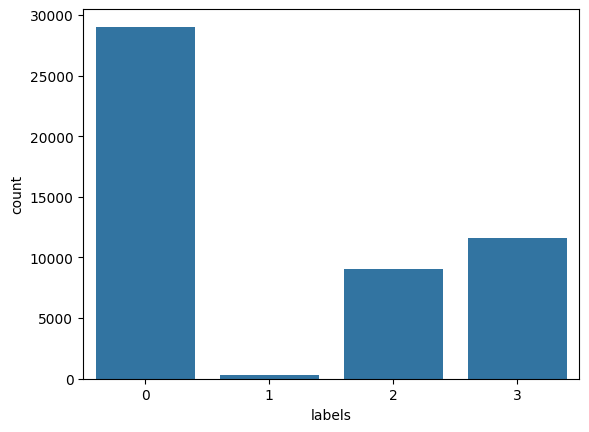

In [45]:
import seaborn as sns
sns.countplot(df_orders_pred, x='labels')

One bigger cluster and one smaller one... but overall, orders are well distributed.

n) Each KMeans cluster has a center (centroid).

You can get the values of the center for each cluster using the `.cluster_centers_` attribute on your KMeans object.

Create a DataFrame with each cluster's centroid values and the names of the features that the model has been trained on.

In [46]:
kmeans.cluster_centers_

array([[-0.38084267,  0.2663602 , -0.3712534 ,  0.08034471],
       [-0.1692933 , -0.15472328, -0.42804486,  8.07958166],
       [-0.4885834 , -0.44543433,  1.74951666, -0.27689193],
       [ 1.33791457, -0.31621648, -0.41829989, -0.21430093]])

In [54]:
df_centers = pd.DataFrame(kmeans.cluster_centers_, df_orders_scaled.columns)

In [55]:
df_centers

0         1         2         3
turnover_grocery -0.380843  0.266360 -0.371253  0.080345
turnover_beauty  -0.169293 -0.154723 -0.428045  8.079582
turnover_baby    -0.488583 -0.445434  1.749517 -0.276892
turnover_home     1.337915 -0.316216 -0.418300 -0.214301

o) What conclusions can you draw? What are the different order profiles that emerge?

<details>
    <summary><i>Solution</i></summary>

Remember that the values in each column are the relative coordinates for each centroid across the features. The greater the magnitude of a feature for a cluster, the more important that feature is to that cluster.

In the example above, depending on the random distribution of rows we have pulled with our query, it's likely that you will see 4 types of orders : 1 with mostly groceries, 1 with beauty products, 1 with baby products and 1 with home products.
</details>

p) Add to `df` a new column label containing labels of each sample.

In [56]:
df['label'] = df_orders_pred['labels']

q) What does this instruction do? What can you say?

In [57]:
df[df["promo_rate"] > 0].groupby("label").size() / df.groupby("label").size()

label
0    0.649728
1    0.460366
2    0.644242
3    0.779919
dtype: float64

Where the promotion rate is greater than zero, we can see that the cluster we have associated with greater grocery turnover uses promotion codes more than others.